In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
import sklearn.preprocessing
import numpy as np
from scipy.io.wavfile import write
from pydub import AudioSegment
import math
import os
import argparse
from pathlib import Path

10700
8.227616e-06


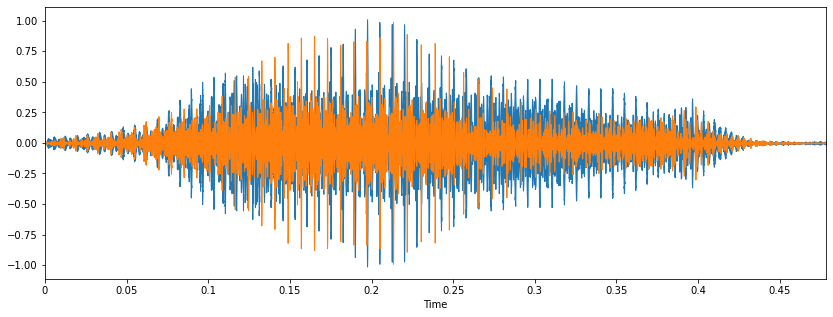

In [434]:
def trim_audio(x):
    #print(x)
    middle = np.argmax(abs(x))
    minI, maxI = middle, middle
    while max(abs(x[minI:minI+500])) > 0.1:
        minI -= 50
    #print(minI)
    while max(abs(x[maxI-500:maxI])) > 0.1:
        maxI += 50
    #print(maxI)
    #print(x[minI:maxI+500])
    return x[minI-500:maxI+1000] if minI > 500 else x[minI:maxI+1000]
    #return minI, maxI

x, sr = librosa.load("UASpeech/audio/M16/M16_B1_CW75_M4.wav")
x = trim_audio(x)
print(len(x))
print(min(abs(x)))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
ipd.Audio(x, rate=sr)
x, sr = librosa.load("UASpeech/audio/M16/M16_B2_CW75_M4.wav")
x = trim_audio(x)
librosa.display.waveplot(x, sr=sr)

In [331]:
def check_file(fn):
    '''fn = "Words/"+get_word_from_filename(fn)+"/"+fn
    if not os.path.isfile(fn) and os.path.isfile(fn[:-4]+".wav"):
        return fn[:-4]+".wav"
    if not os.path.isfile(fn):
        return None
    return fn'''
    fword, fnum = split_filename(fn)
    for file in os.listdir("Words/"+fword):
        if fword+fnum in file and file[0] != "p":
            return file
    return None

In [431]:
def process_audio(fn):
    #word, num = split_filename(fn)
    #fn = check_file(fn)
    path = Path(fn)
    #print(fn)
    if fn == None:
        print("Not valid File")
    
    # checks to see if file already exists
    '''if Path("/".join(path.parts[:-1])+"/.Processed/p"+path.name).is_file():
        file = "/".join(path.parts[:-1])+"/.Processed/p"+path.name
        time = librosa.get_duration(filename=file)
        return librosa.load(file, sr = int(4410/time))'''
        
    x, sr = librosa.load(fn)
    #trim audio
    #print("original: "+ str(x))
    x = trim_audio(x)
    #print("trimmed: " + str(x))
    
    #convert to audio file
    strdir = "/".join(path.parts[:-1])+"/.Processed/"
    try:
        #print(strdir)
        os.mkdir(strdir)
    except:
        pass
        
    newFilename = strdir + 'p' + path.name
    try:
        #print(get_word_from_filename(fn))
        #print(fn)
        scaled = np.int16(x/np.max(np.abs(x)) * 32767)
    except:
        print(x/np.max(np.abs(x)))
    write(newFilename, 44100, scaled)
    time = librosa.get_duration(filename=newFilename)
    x, sr = librosa.load(newFilename, sr = int(4410/time))
    return x, sr

process_audio("UASpeech/audio/M16/M16_B1_C1_M4.wav")
#print(os.listdir("UASpeech/audio/M16/"))

(array([-0.00558995, -0.00853361, -0.01235158, ...,  0.00071045,
        -0.00786782,  0.        ], dtype=float32),
 10688)

In [333]:
def get_np_difs(np1, np2):
    dif_df = np.square(np1 - np2)
    #print(dif_df)
    row_dif = np.sqrt(np.sum(dif_df, axis = 1))
    #print("row_dif\n")
    #print(row_dif)
    row_dif = np.sum(row_dif)
    #print(row_dif)
    
    col_dif = np.sqrt(np.sum(dif_df, axis = 0))
    #print("col_dif\n")
    #print(col_dif)
    col_dif = np.sum(col_dif)
    #print(col_dif)
    return row_dif, col_dif


In [334]:
def get_zero_crossing_dif(x1, x2):
    zero_crossings1 = librosa.zero_crossings(x1, pad=False)
    zero_crossings2 = librosa.zero_crossings(x2, pad=False)
    return abs(sum(zero_crossings1) - sum(zero_crossings2))

In [335]:
def lasso_regression(row_dif, col_dif, num_zero_crossings):
    return row_dif**2 + col_dif**2 + num_zero_crossings**2

In [336]:
def split_filename(fn):
    for i in range(len(fn)):
        if fn[i].isnumeric():
            return fn[:i], fn[i:]

In [115]:
i=0

16
4410


'x, sr = process_audio("UASpeech/audio/M16/M16_B2_CW75_M3.wav")\nprint(len(x))\n#x, sr = process_audio("UASpeech/audio/M16/M16_B2_CW1_M3.wav")\n\nlibrosa.display.waveplot(x, sr=sr)'

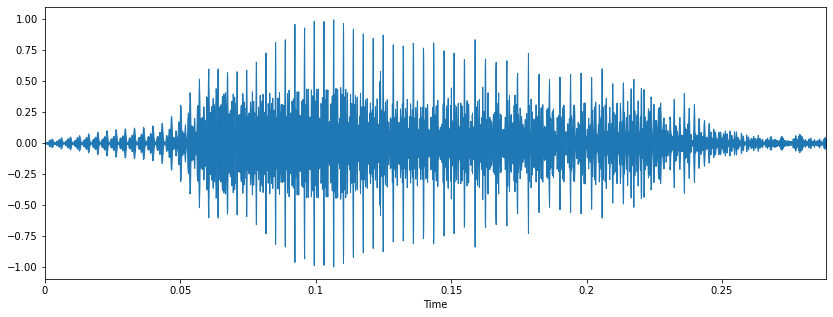

In [359]:
i+=1
print(i)
x, sr = process_audio("UASpeech/audio/M16/M16_B3_CW75_M4.wav")
print(len(x))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

'''x, sr = process_audio("UASpeech/audio/M16/M16_B2_CW75_M3.wav")
print(len(x))
#x, sr = process_audio("UASpeech/audio/M16/M16_B2_CW1_M3.wav")

librosa.display.waveplot(x, sr=sr)'''

In [321]:
import csv

x = 0
with open('UASpeech/speaker_wordlist.csv', mode='r') as infile:
    reader = csv.reader(infile)
    word_dict = {rows[1]:rows[0] for rows in reader}
del word_dict['FILE NAME']
print(word_dict)

{'D3': 'Three', 'D9': 'Nine', 'D0': 'Zero', 'D6': 'Six', 'D7': 'Seven', 'D8': 'Eight', 'D4': 'Four', 'D5': 'Five', 'D1': 'One', 'D2': 'Two', 'LE': 'Echo', 'LD': 'Delta', 'LW': 'Whiskey', 'LK': 'Kilo', 'LS': 'Sierra', 'LT': 'Tango', 'LU': 'Uniform', 'LX': 'X-ray', 'LJ': 'Juliet', 'LC': 'Charlie', 'LQ': 'Quebec', 'LP': 'Papa', 'LZ': 'Zulu', 'LR': 'Romeo', 'LF': 'Foxtrot', 'LI': 'India', 'LL': 'Lima', 'LV': 'Victor', 'LY': 'Yankee', 'LG': 'Golf', 'LH': 'Hotel', 'LN': 'November', 'LB': 'Bravo', 'LO': 'Oscar', 'LA': 'Alpha', 'LM': 'Mike', 'C1': 'Command', 'C2': 'Backspace', 'C3': 'Delete', 'C4': 'Enter', 'C5': 'Tab', 'C6': 'Escape', 'C7': 'Alt', 'C8': 'Control', 'C9': 'Shift', 'C10': 'Line', 'C11': 'Paragraph', 'C12': 'Sentence', 'C13': 'Paste', 'C14': 'Cut', 'C15': 'Copy', 'C16': 'Upward', 'C17': 'Downward', 'C18': 'Left', 'C19': 'Right', 'CW1': 'the', 'CW2': 'of', 'CW3': 'and', 'CW4': 'a', 'CW5': 'to', 'CW6': 'in', 'CW7': 'is', 'CW8': 'you', 'CW9': 'that', 'CW10': 'it', 'CW11': 'he', 'CW1

In [395]:
def get_word_from_filename(fn):
    path = Path(fn)
    fn = path.name.split('_')
    #print(len(fn))
    #print(path, fn, len(fn), fn[2])
    return word_dict["_".join(fn[1], fn[2])] if "UW" in fn[2] else word_dict[fn[2]]
print("no" in "yes")
get_word_from_filename("UASpeech/audio/M16/M16_B3_CW75_M4.wav")

False


'no'

In [432]:
def compare(person, word, first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, mfccs1):
    for i in range(1,4):
        filename = "UASpeech/audio/"+person+"/"+person+"_B"+str(i)+"_"+word+"_M4.wav"
        if filename == first_word_filename:
            continue
        #print(filename)
        x2, sr = process_audio(filename)
        mfccs2 = librosa.feature.mfcc(x2, sr=sr)
        #print(mfccs2.shape)
        if mfccs2.shape != mfccs1.shape:
            continue
        difs = get_np_difs(mfccs1, mfccs2)
        lasso_dif = lasso_regression(difs[0], difs[1], get_zero_crossing_dif(x1, x2))
        if min_difs == None or min_difs > lasso_dif:
            min_difs = lasso_dif
            min_file = filename
        elif second_min_difs == None or second_min_difs > lasso_dif:
            second_min_difs = lasso_dif
            second_min_file = filename
    return min_difs, min_file, second_min_difs, second_min_file

In [435]:
#%%timeit
wordnum = 1
for wordnum in range(1,4):
    first_word_filename = "UASpeech/audio/M16/M16_B"+str(wordnum)+"_CW75_M3.wav"
    min_difs = None
    min_file = ""
    second_min_difs = None
    second_min_file = ""
    x1, sr = process_audio(first_word_filename)
    mfccs1 = librosa.feature.mfcc(x1, sr=sr)
    for i in range(1, 100):
        min_difs, min_file, second_min_difs, second_min_file = compare("M16", "CW"+str(i), first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, mfccs1)
    #for i in range(1,20):
    #min_difs, min_file, second_min_difs, second_min_file = compare("M16", "C"+str(i), first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, mfccs1)
    #print(min_file)
    print("expected: "+get_word_from_filename(first_word_filename)+"\t recieved: ", end="")
    print(get_word_from_filename(min_file),str(second_min_difs-min_difs),get_word_from_filename(second_min_file))

expected: no	 recieved: no 238072.30225722864 no
expected: no	 recieved: no 992993.3866666667 no
expected: no	 recieved: no 1266589.544944059 down


In [ ]:
file, x, sr = process_audio("No3.m4a")
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

In [ ]:
yesx, sr = librosa.load('Yes1.m4a')
mfccsyes = librosa.feature.mfcc(yesx, sr=sr)

nox, sr = librosa.load('No1.m4a')
mfccsno = librosa.feature.mfcc(nox, sr=sr)

testx, sr = librosa.load('No2.m4a')
mfccstest = librosa.feature.mfcc(testx, sr=sr) 
print(np.linalg.norm(mfccsno-mfccstest))

In [ ]:
import os
import shutil

In [391]:
'''path = "F"
dirs = os.listdir(path)
for d in dirs: # person
    print(d,end = "\n____\n")
    try:
        os.makedir("Extra")
    except:
        pass
    if os.path.isdir(os.path.join(path, d)):
        for d_1 in os.listdir(path +"/"+ d): # session level
            if os.path.isfile(os.path.join(path +"/"+ d, d_1)):
                continue
            print(d_1, end="\n\n")
            for d_2 in os.listdir(path +"/"+ d +"/"+ d_1): # files
                print(d_2)
                try:
                    if d_2=="wav_arrayMic" or d_2=="prompts" or d_2=="wav_headMic":
                        shutil.move(path +"/"+ d +"/"+ d_1 +"/"+ d_2, path +"/"+ d)
                    else:
                        shutil.move(path +"/"+ d +"/"+ d_1 +"/"+ d_2, path +"/"+ d +"/"+ "Extra")
                except Exception as exc:
                    print(exc)'''
print(np.arange(24).reshape(4,1,3,2)*np.arange(1).reshape(1,1,1))
np.power(np.arange(100), 2)

[[[[0 0]
   [0 0]
   [0 0]]]


 [[[0 0]
   [0 0]
   [0 0]]]


 [[[0 0]
   [0 0]
   [0 0]]]


 [[[0 0]
   [0 0]
   [0 0]]]]


array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])